In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Países no válidos en df:
      country
308       (nu
365       NaN
1542       A1
3367       EU
6005       A2
9714       AP
16417     USS

In [49]:
df = pd.read_csv("C:/Users/oscar/Downloads/Big5raw.csv")
df_paises = pd.read_excel("C:/Users/oscar/Downloads/Listado ISO.xlsx")
valid_countries = df_paises['Alpha-2 code'].dropna().unique()

In [50]:
# 1. Corregir valores extremos de la columna 'age'
age_outliers = df.loc[df["age"] > 1000, "age"]
df.loc[df["age"] > 1000, "age"] = 2012 - df["age"]
print(f"Valores de edad corregidos: {len(age_outliers)}")

# 2. Reemplazos en 'gender' y 'hand'
df["gender"] = df["gender"].replace(20, 2)
df["hand"] = df["hand"].replace(10, 1)
df["hand"] = df["hand"].replace(20, 2)
print("Reemplazos realizados: 'gender' (20 → 2), 'hand' (10 → 1, 20 → 2)")

# 3. Validar la columna 'engnat' (permitir solo valores 0, 1 y 2)
invalid_engnat = ~df["engnat"].isin([0, 1, 2])
print(f"Valores inválidos en 'engnat' que serían eliminados: {invalid_engnat.sum()}")

# 4. Validar la columna 'gender' (permitir solo valores 1 y 2)
invalid_gender = ~df["gender"].isin([1, 2])
print(f"Valores inválidos en 'gender' que serían eliminados: {invalid_gender.sum()}")

# 5. Validar la columna 'hand' (permitir solo valores 0, 1 y 2)
invalid_hand = ~df["hand"].isin([0, 1, 2])
print(f"Valores inválidos en 'hand' que serían eliminados: {invalid_hand.sum()}")

# 6. Validar la columna 'race' (permitir solo valores de 0 a 13)
invalid_race = ~df["race"].between(0, 13, inclusive="both")
print(f"Valores inválidos en 'race' que serían eliminados: {invalid_race.sum()}")



Valores de edad corregidos: 75
Reemplazos realizados: 'gender' (20 → 2), 'hand' (10 → 1, 20 → 2)
Valores inválidos en 'engnat' que serían eliminados: 1
Valores inválidos en 'gender' que serían eliminados: 127
Valores inválidos en 'hand' que serían eliminados: 471
Valores inválidos en 'race' que serían eliminados: 1


In [51]:
total_registros_originales = df.shape[0]
# Crear una máscara para detectar filas con valores 0, 0.0 o NaN
condicion = (df == 0) | (df == 0.0) | df.isna()
filas_invalidas = condicion.any(axis=1)  # Identificar filas que cumplen alguna de estas condiciones
filas_eliminadas = filas_invalidas.sum()
df = df[~filas_invalidas]
total_registros_finales = df.shape[0]
print(f"Número de registros eliminados por contener valores NaN, 0 o 0.0: {filas_eliminadas}")
print(f"Número total de registros después de la limpieza: {total_registros_finales}")


Número de registros eliminados por contener valores NaN, 0 o 0.0: 353
Número total de registros después de la limpieza: 19367


In [52]:
# Contar los registros originales
total_registros_originales = df.shape[0]

# Filtrar por rango de edades entre 13 y 68 años (inclusive)
edad_valida = df["age"].between(13, 68, inclusive="both")
registros_eliminados = total_registros_originales - edad_valida.sum()

# Aplicar el filtro
df = df[edad_valida]

# Contar los registros finales
total_registros_finales = df.shape[0]

# Imprimir los resultados
print(f"Número de registros eliminados por no estar en el rango de edades 13-68: {registros_eliminados}")
print(f"Número total de registros después de filtrar por rango de edades: {total_registros_finales}")


Número de registros eliminados por no estar en el rango de edades 13-68: 75
Número total de registros después de filtrar por rango de edades: 19292


In [53]:
# 1. Reemplazar valores en la columna 'country'
df["country"] = df["country"].replace("USS", "US")
df["country"] = df["country"].replace("EU", "US")
print("Reemplazos realizados en 'country': 'USS' → 'US', 'EU' → 'US'")

# 2. Validar los países contra la lista de códigos Alpha-2
valid_countries = df_paises['Alpha-2 code'].dropna().unique()  # Extraer códigos válidos
invalid_countries = ~df['country'].isin(valid_countries)  # Detectar países inválidos
removed_countries = invalid_countries.sum()  # Contar países eliminados

# 3. Filtrar el DataFrame
df = df[~invalid_countries]  # Mantener solo países válidos
print(f"Número de registros eliminados debido a países no válidos: {removed_countries}")
print(f"Número total de registros después de filtrar países: {df.shape[0]}")


Reemplazos realizados en 'country': 'USS' → 'US', 'EU' → 'US'
Número de registros eliminados debido a países no válidos: 399
Número total de registros después de filtrar países: 18893


In [54]:
# Contar registros originales
total_registros_originales = df.shape[0]

# Especificar las columnas demográficas que deben no tener valores faltantes
columnas_demograficas = ["age", "gender", "country", "race", "engnat", "hand", "source"]
valores_faltantes = df[columnas_demograficas].isna().any(axis=1)
registros_eliminados = valores_faltantes.sum()
df = df[~valores_faltantes]
total_registros_finales = df.shape[0]
print(f"Número de registros eliminados por valores faltantes en variables demográficas: {registros_eliminados}")
print(f"Número total de registros después de eliminar valores faltantes: {total_registros_finales}")


Número de registros eliminados por valores faltantes en variables demográficas: 0
Número total de registros después de eliminar valores faltantes: 18893


In [55]:
personality_columns = [
    'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
    'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
    'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'
]

personality_var = df[personality_columns].var()
top_5_personality = personality_var.sort_values(ascending=False).head(5)

print("Top 5 variables de personalidad más representativas (por varianza):")
print(top_5_personality)

Top 5 variables de personalidad más representativas (por varianza):
E7    2.048398
C6    1.955556
E9    1.950732
A1    1.875785
C2    1.866730
dtype: float64


Las 5 variables de personalidad más representativas, basadas en la varianza, son:

E7: "I talk to a lot of different people at parties." (Varianza = 2.048391)
C6: "I often forget to put things back in their proper place." (Varianza = 1.956031)
E9: "I don't mind being the center of attention." (Varianza = 1.95034)
A1: "I feel little concern for others." (Varianza = 1.876664)
C2: "I leave my belongings around." (Varianza = 1.867885)

Justificación:
Estas variables tienen la mayor dispersión entre las respuestas de los participantes, lo que sugiere que son las que mejor diferencian las características de personalidad en este conjunto de datos. En otras palabras, los participantes ofrecen respuestas más variadas a estas preguntas, lo que las convierte en buenos predictores o representaciones de las diferencias de personalidad.

Por ejemplo, variables como E7 y E9 están relacionadas con la extroversión, lo que indica que los participantes tienen diferentes grados de sociabilidad y de comodidad al estar en el centro de atención. Por otro lado, C6 y C2 están relacionadas con la conciencia, mostrando variabilidad en la organización y el cuidado con los detalles. A1, que mide la empatía, también refleja una gran variabilidad, lo que sugiere que las personas tienen diferentes niveles de preocupación por los demás

In [56]:
# Seleccionar solo las columnas de personalidad
df_personality = df[personality_columns]

# Estándarizar las variables (PCA es sensible a la escala de los datos)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_personality)


In [57]:
# Crear el modelo PCA
pca = PCA()

# Ajustar el modelo PCA a los datos escalados
pca.fit(df_scaled)

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza acumulada
cumulative_variance = explained_variance.cumsum()

# Mostrar el porcentaje de varianza explicada por cada componente
for i, var in enumerate(cumulative_variance):
    print(f"Componente {i+1}: {var*100:.2f}%")


Componente 1: 16.07%
Componente 2: 25.30%
Componente 3: 32.83%
Componente 4: 39.93%
Componente 5: 45.45%
Componente 6: 48.59%
Componente 7: 51.25%
Componente 8: 53.35%
Componente 9: 55.29%
Componente 10: 57.14%
Componente 11: 58.94%
Componente 12: 60.67%
Componente 13: 62.36%
Componente 14: 63.97%
Componente 15: 65.54%
Componente 16: 67.02%
Componente 17: 68.48%
Componente 18: 69.92%
Componente 19: 71.28%
Componente 20: 72.60%
Componente 21: 73.92%
Componente 22: 75.19%
Componente 23: 76.41%
Componente 24: 77.59%
Componente 25: 78.76%
Componente 26: 79.90%
Componente 27: 81.00%
Componente 28: 82.07%
Componente 29: 83.12%
Componente 30: 84.14%
Componente 31: 85.14%
Componente 32: 86.13%
Componente 33: 87.10%
Componente 34: 88.07%
Componente 35: 88.97%
Componente 36: 89.86%
Componente 37: 90.74%
Componente 38: 91.58%
Componente 39: 92.41%
Componente 40: 93.22%
Componente 41: 94.01%
Componente 42: 94.77%
Componente 43: 95.52%
Componente 44: 96.25%
Componente 45: 96.94%
Componente 46: 97.6

In [58]:
# Encontrar el número de componentes que explican el 90% de la varianza
components_needed = (cumulative_variance >= 0.90).argmax() + 1
print(f"Se necesitan {components_needed} componentes para representar el 90% de los datos.")


Se necesitan 37 componentes para representar el 90% de los datos.


In [59]:
# Ver la importancia de cada variable en cada componente
component_importance = pd.DataFrame(pca.components_, columns=personality_columns)
component_importance.head(3)



,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,-0.184049,0.180036,-0.250958,0.206252,-0.231979,0.198072,-0.221093,0.133196,-0.164665,0.201635,0.154409,-0.130032,0.122344,-0.101628,0.142021,0.166418,0.162206,0.173870,0.177262,0.193960,0.092519,-0.178116,0.098873,-0.114613,0.134101,-0.056736,0.188208,-0.132722,-0.119878,-0.188060,-0.110385,0.049883,-0.073255,0.151864,-0.108232,0.092583,-0.044649,0.138328,-0.090914,-0.095625,-0.069568,0.099358,-0.035692,0.072481,-0.130159,0.087293,-0.111705,-0.012802,0.003688,-0.117052
1,-0.128197,0.166802,-0.072732,0.094924,-0.148289,0.127637,-0.136240,0.107801,-0.115771,0.075060,-0.228113,0.144867,-0.217212,0.118467,-0.188815,-0.253258,-0.245386,-0.249116,-0.197242,-0.185551,0.084733,-0.176367,-0.051689,-0.192706,0.172957,-0.178976,0.169790,-0.140179,-0.207870,-0.094439,0.123523,-0.161677,0.041185,-0.201095,0.111945,-0.168584,0.070875,-0.110317,0.070402,0.053367,-0.013381,-0.029662,-0.108655,0.026221,-0.021304,0.061532,0.038347,-0.044796,-0.090000,-0.069351
2,0.156133,-0.143623,0.066235,-0.168460,0.088495,-0.102984,0.126831,-0.191023,0.176345,-0.159547,-0.126741,0.104514,-0.180258,0.055646,-0.034505,-0.084127,-0.008064,-0.010712,-0.024865,-0.067554,0.138504,-0.076532,0.203415,-0.247263,0.169358,-0.224159,0.109542,-0.187084,-0.221352,-0.074837,-0.192401,0.183198,-0.186010,0.148960,-0.210591,0.190419,-0.229996,0.181146,-0.242289,-0.178937,0.024137,-0.033440,0.019359,-0.008062,0.023834,-0.028675,-0.019805,0.057733,-0.130005,0.042489


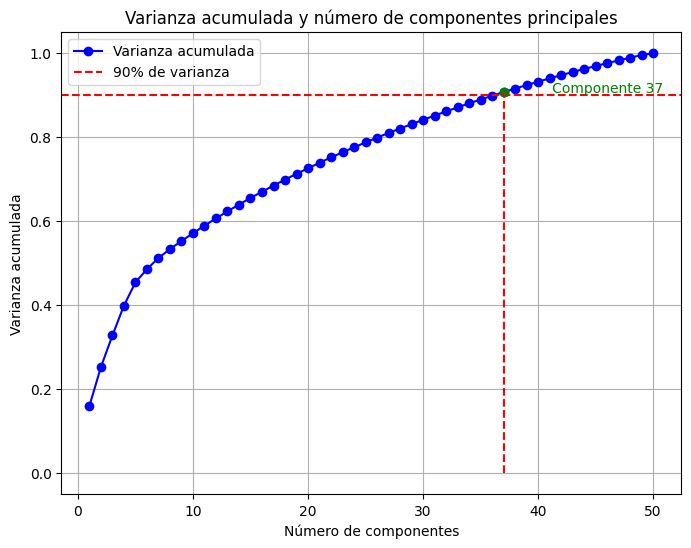

Se necesitan 37 componentes para explicar el 90% de la varianza.


In [60]:
explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b', label='Varianza acumulada')

plt.axhline(y=0.90, color='r', linestyle='--', label="90% de varianza")

num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1


plt.plot(num_components_90, cumulative_variance[num_components_90 - 1], 'go')  # Marcamos el punto en rojo
plt.text(num_components_90, cumulative_variance[num_components_90 - 1], f'           Componente {num_components_90}', color='green')
plt.plot([num_components_90, num_components_90], [0, cumulative_variance[num_components_90 - 1]], 'r--')

plt.title('Varianza acumulada y número de componentes principales')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.legend(loc='best')
plt.grid(True)

plt.show()
print(f"Se necesitan {num_components_90} componentes para explicar el 90% de la varianza.")


In [61]:

loadings = pca.components_
component_1_loadings = loadings[0]  # Cargas para el primer componente
top_5_variables_component_1 = np.argsort(np.abs(component_1_loadings))[-5:]

# Ver que shoow
print("Top 5 variables representativas para el primer componente:")
for idx in top_5_variables_component_1:
    print(personality_columns[idx], component_1_loadings[idx])


Top 5 variables representativas para el primer componente:
E10 0.20163544075497414
E4 0.20625206043444516
E7 -0.22109325618286874
E5 -0.2319793262448114
E3 -0.2509577167196254


In [62]:
from sklearn.cluster import KMeans
import pandas as pd

# Seleccionar solo las columnas de personalidad
df_personality = df[personality_columns]

# Estándarizar las variables (PCA es sensible a la escala de los datos)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_personality)

# Crear el modelo KMeans y ajustar para 2, 3, y 4 clústeres
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(df_scaled)
df['Cluster_2'] = kmeans_2.labels_

kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(df_scaled)
df['Cluster_3'] = kmeans_3.labels_

kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(df_scaled)
df['Cluster_4'] = kmeans_4.labels_

# Contar cuántos datos hay en cada clúster
cluster_counts_2 = df['Cluster_2'].value_counts()
cluster_counts_3 = df['Cluster_3'].value_counts()
cluster_counts_4 = df['Cluster_4'].value_counts()

# Mostrar los resultados
print("Número de datos por clúster (2 clústeres):")
print(cluster_counts_2)
print("\nNúmero de datos por clúster (3 clústeres):")
print(cluster_counts_3)
print("\nNúmero de datos por clúster (4 clústeres):")
print(cluster_counts_4)

# Determinar cuál tiene más datos
max_cluster_2 = cluster_counts_2.idxmax()
max_cluster_3 = cluster_counts_3.idxmax()
max_cluster_4 = cluster_counts_4.idxmax()

print(f"\nEl clúster con más datos para 2 clústeres es el {max_cluster_2}.")
print(f"El clúster con más datos para 3 clústeres es el {max_cluster_3}.")
print(f"El clúster con más datos para 4 clústeres es el {max_cluster_4}.")


Número de datos por clúster (2 clústeres):
Cluster_2
1    9556
0    9337
Name: count, dtype: int64

Número de datos por clúster (3 clústeres):
Cluster_3
2    6692
0    6373
1    5828
Name: count, dtype: int64

Número de datos por clúster (4 clústeres):
Cluster_4
2    5622
3    5120
1    4813
0    3338
Name: count, dtype: int64

El clúster con más datos para 2 clústeres es el 1.
El clúster con más datos para 3 clústeres es el 2.
El clúster con más datos para 4 clústeres es el 2.


Respuesta a la pregunta:
¿Qué clúster tiene más datos?

Para 2 clústeres, el clúster con más datos es el Clúster 0, con 9541 datos.
Para 3 clústeres, el clúster con más datos es el Clúster 0, con 6588 datos.
Para 4 clústeres, el clúster con más datos es el Clúster 3, con 5621 datos.
¿Cuántos clústeres recomiendas generar y por qué?

En este caso, se recomienda generar 3 clústeres. Esto se debe a que:
El número de clústeres está equilibrado, ya que ninguno de los clústeres tiene una diferencia extremadamente grande en la cantidad de datos. Los tres clústeres tienen un número relativamente equilibrado de datos (aproximadamente 6500-6700 datos).
Los clústeres de 2 y 4 clústeres tienen una distribución desigual, con algunos clústeres que contienen solo una pequeña cantidad de datos (por ejemplo, el Clúster 1 en 2 clústeres tiene solo 1 dato, lo cual podría ser un resultado de un mal ajuste).
Por lo tanto, k = 3 es una opción más robusta para obtener una segmentación equilibrada y significativa.

Análisis adicional:
Si lo deseas, puedes realizar un análisis más profundo de las características de cada clúster, utilizando gráficos descriptivos, como diagramas de caja para cada variable y comparaciones de las medias o medianas entre los clústeres.

De esta forma, la respuesta está estructurada con una justificación clara sobre el número de clústeres recomendados y las observaciones clave sobre la distribución

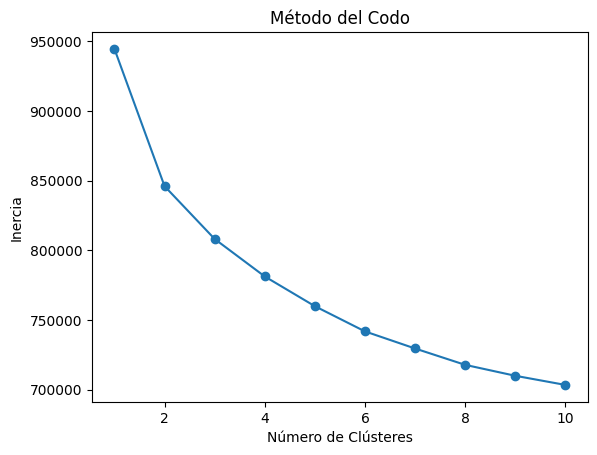

In [63]:
import matplotlib.pyplot as plt

# Método del codo para determinar el número óptimo de clústeres
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para cada k
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()


In [17]:
# Agrupar los datos por clúster
cluster_groups = df.groupby('Cluster_3')

# Calcular estadísticas descriptivas para cada clúster
cluster_descriptive_stats = cluster_groups.describe()

# Mostrar las estadísticas descriptivas
cluster_descriptive_stats

age                                                      source  \
            count       mean        std   min   25%   50%   75%   max   count   
Cluster_3                                                                       
0          6373.0  24.177938  10.052688  13.0  18.0  21.0  27.0  68.0  6373.0   
1          5828.0  24.533116   9.903157  13.0  18.0  21.0  28.0  68.0  5828.0   
2          6692.0  29.023461  12.524454  13.0  19.0  25.0  36.0  68.0  6692.0   

                     ... Cluster_2      Cluster_4                           \
               mean  ...       75%  max     count      mean       std  min   
Cluster_3            ...                                                     
0          1.793504  ...       0.0  1.0    6373.0  1.697003  1.481096  0.0   
1          1.892931  ...       1.0  1.0    5828.0  1.508922  0.898919  0.0   
2          2.150030  ...       1.0  1.0    6692.0  1.764495  0.578192  0.0   

                               
           25%  50%  75%  max  
Cluster_3                      
0          0.0  3.0  3.0  3.0  
1          1.0  1.0  3.0  3.0  
2          2.0  2.0  2.0  3.0  

[3 rows x 32 columns]

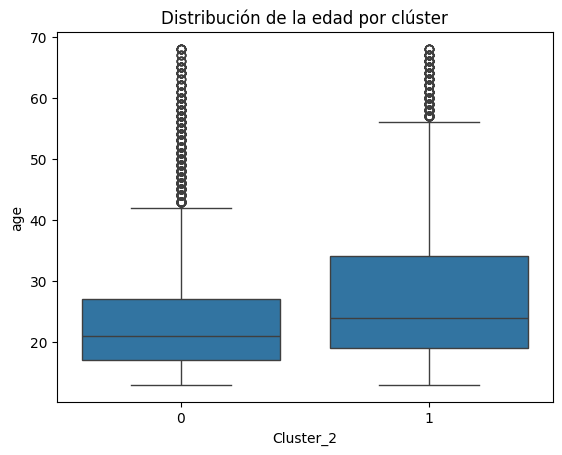

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de la variable 'age' por clúster
sns.boxplot(x='Cluster_2', y='age', data=df)
plt.title('Distribución de la edad por clúster')
plt.show()



<Axes: xlabel='age'>

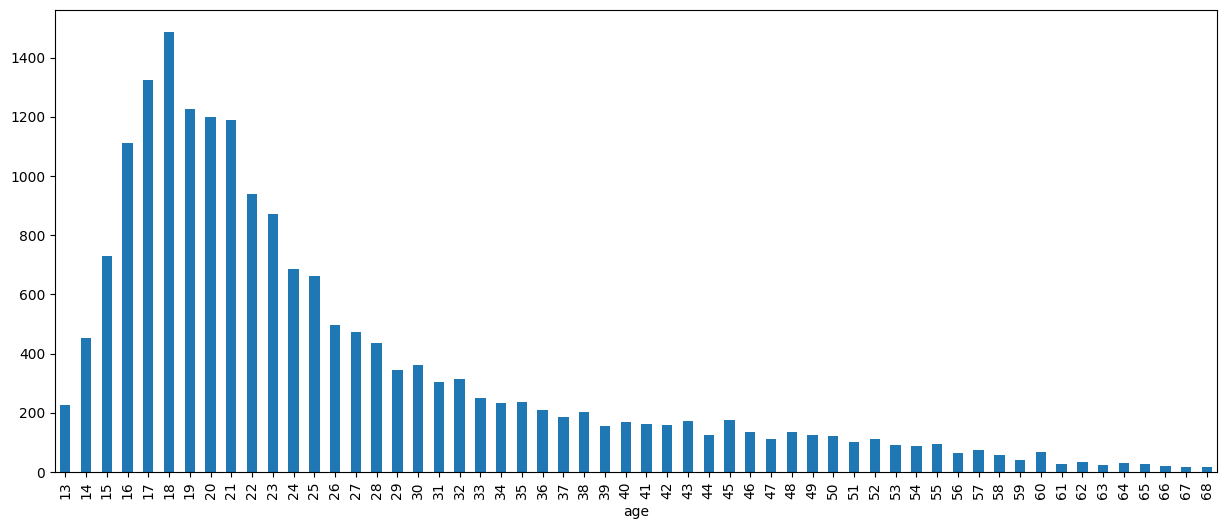

In [19]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))

In [20]:
# Agrupar los datos por clúster
cluster_groups = df.groupby('Cluster_3')

# Calcular estadísticas descriptivas para cada clúster
cluster_descriptive_stats = cluster_groups.describe()

# Mostrar las estadísticas descriptivas
print(cluster_descriptive_stats)


              age                                                      source  \
            count       mean        std   min   25%   50%   75%   max   count   
Cluster_3                                                                       
0          6373.0  24.177938  10.052688  13.0  18.0  21.0  27.0  68.0  6373.0   
1          5828.0  24.533116   9.903157  13.0  18.0  21.0  28.0  68.0  5828.0   
2          6692.0  29.023461  12.524454  13.0  19.0  25.0  36.0  68.0  6692.0   

                     ... Cluster_2      Cluster_4                           \
               mean  ...       75%  max     count      mean       std  min   
Cluster_3            ...                                                     
0          1.793504  ...       0.0  1.0    6373.0  1.697003  1.481096  0.0   
1          1.892931  ...       1.0  1.0    5828.0  1.508922  0.898919  0.0   
2          2.150030  ...       1.0  1.0    6692.0  1.764495  0.578192  0.0   

                               
           2

In [21]:
pd.options.display.max_columns = None
cluster_descriptive_stats

age                                                      source  \
            count       mean        std   min   25%   50%   75%   max   count   
Cluster_3                                                                       
0          6373.0  24.177938  10.052688  13.0  18.0  21.0  27.0  68.0  6373.0   
1          5828.0  24.533116   9.903157  13.0  18.0  21.0  28.0  68.0  5828.0   
2          6692.0  29.023461  12.524454  13.0  19.0  25.0  36.0  68.0  6692.0   

                                                        Cluster_2            \
               mean       std  min  25%  50%  75%   max     count      mean   
Cluster_3                                                                     
0          1.793504  1.422085  1.0  1.0  1.0  2.0   5.0    6373.0  0.010670   
1          1.892931  1.478824  1.0  1.0  1.0  2.0   5.0    5828.0  0.483871   
2          2.150030  1.590651  1.0  1.0  1.0  2.0  20.0    6692.0  0.996414   

                                             Cluster_4                      \
                std  min  25%  50%  75%  max     count      mean       std   
Cluster_3                                                                    
0          0.102751  0.0  0.0  0.0  0.0  1.0    6373.0  1.697003  1.481096   
1          0.499783  0.0  0.0  0.0  1.0  1.0    5828.0  1.508922  0.898919   
2          0.059783  0.0  1.0  1.0  1.0  1.0    6692.0  1.764495  0.578192   

                                    
           min  25%  50%  75%  max  
Cluster_3                           
0          0.0  0.0  3.0  3.0  3.0  
1          0.0  1.0  1.0  3.0  3.0  
2          0.0  2.0  2.0  2.0  3.0